In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

In [18]:
class MultiClassSVM(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MultiClassSVM, self).__init__()
        self.linear = nn.Linear(input_size, num_classes,bias=False)

    def forward(self, x):
        return self.linear(x)
    
def hinge_loss(outputs, labels):
    num_classes = outputs.size(1)
    correct_indices = labels.view(-1, 1)
    correct_scores = outputs.gather(1, correct_indices)
    margins = torch.clamp(1 - (correct_scores - outputs), min=0)
    margins.scatter_(1, correct_indices, 0)
    loss = margins.mean()
    return loss

def train(
    model,
    train_loader,    
    ):
    for batch_idx, (data, target) in enumerate(train_loader):
        output = model(data.float())
        loss = hinge_loss(output, target)
        loss.backward()
        _, argmax = torch.max(output, 1)
        accuracy = (target == argmax.squeeze()).float().mean()
        print("accuracy is",accuracy)


In [20]:
svm = MultiClassSVM(input_size=28,num_classes=10)

train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        root=".",
        train=True,
        download=True,
        transform=torchvision.transforms.Compose(
            [
                torchvision.transforms.PILToTensor(),
                
            ]
        ),
        
    ),
    batch_size=64,
    shuffle=True,
    
)
test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST(
        root=".",
        train=False,
        transform=torchvision.transforms.Compose(
            [
                torchvision.transforms.PILToTensor(),
                
            ]
        ),
    ),
    batch_size=64,
)
train(svm,train_loader)

RuntimeError: Index tensor must have the same number of dimensions as input tensor

In [42]:
import numpy as np
import os
data = np.load('E:/ASU/Norse/w1.npy')
print(data)

[[[[0.0000000e+00 6.1276037e-01 1.0000000e+00 0.0000000e+00
    2.3951931e-01]
   [4.5928937e-01 8.0429012e-01 0.0000000e+00 6.8273240e-01
    0.0000000e+00]
   [1.3847785e-01 0.0000000e+00 4.4294482e-01 0.0000000e+00
    1.0000000e+00]
   [4.6834543e-01 2.5654429e-01 0.0000000e+00 0.0000000e+00
    0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 9.4560128e-01 2.7815887e-01
    0.0000000e+00]]

  [[0.0000000e+00 0.0000000e+00 0.0000000e+00 8.6605209e-01
    0.0000000e+00]
   [0.0000000e+00 3.0091000e-01 6.3309968e-01 0.0000000e+00
    3.2255387e-01]
   [0.0000000e+00 0.0000000e+00 0.0000000e+00 2.8748897e-01
    0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 4.5593104e-01 6.3490462e-01
    0.0000000e+00]
   [0.0000000e+00 0.0000000e+00 5.1849568e-03 4.2982095e-01
    1.0000000e+00]]]


 [[[9.9999988e-01 0.0000000e+00 9.9999988e-01 0.0000000e+00
    0.0000000e+00]
   [0.0000000e+00 9.9999988e-01 9.9999988e-01 0.0000000e+00
    0.0000000e+00]
   [9.9999988e-01 9.9999988e-01 0.0000000e+00 

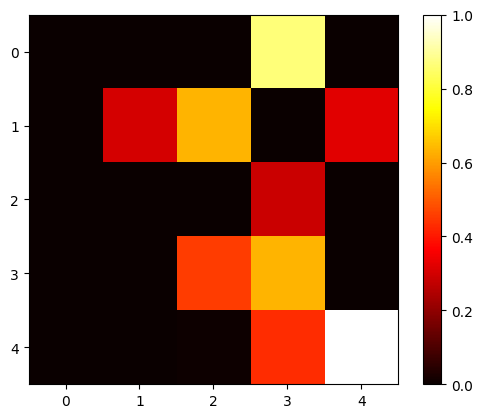

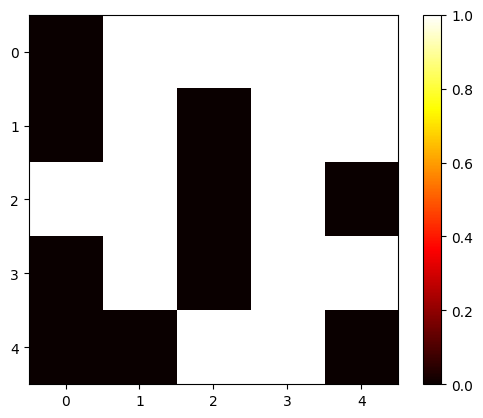

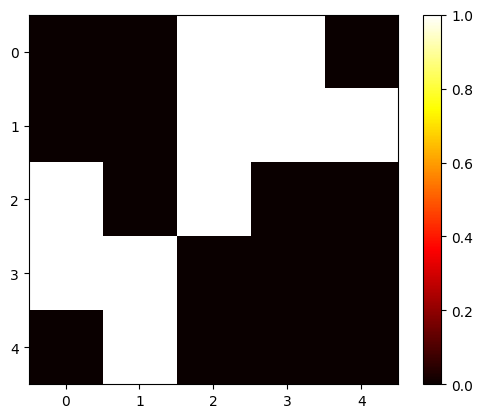

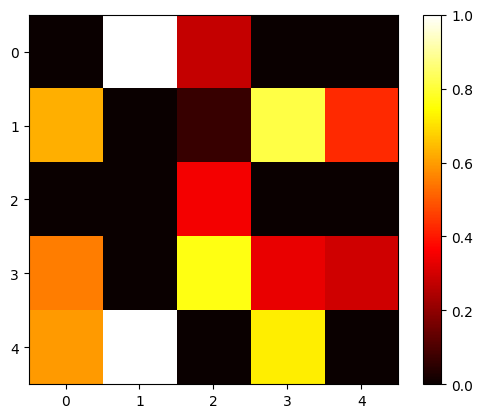

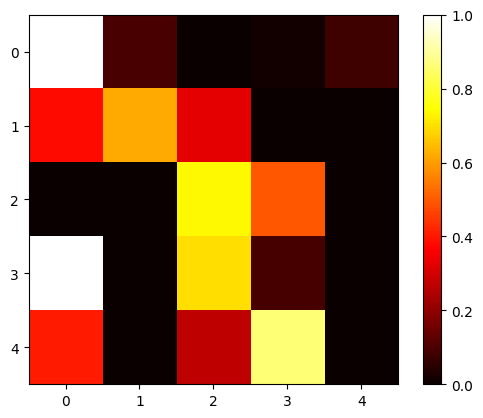

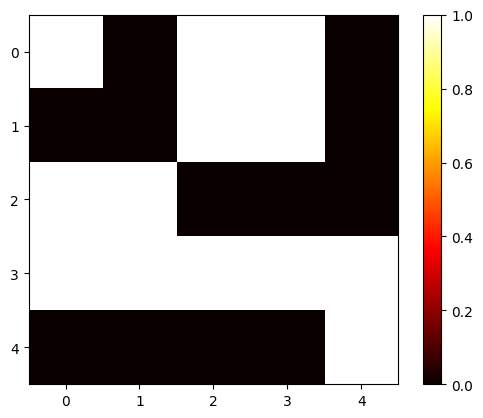

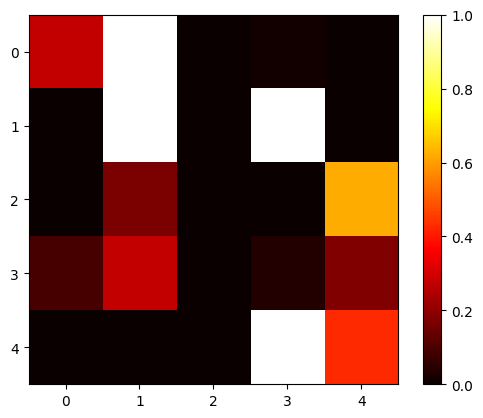

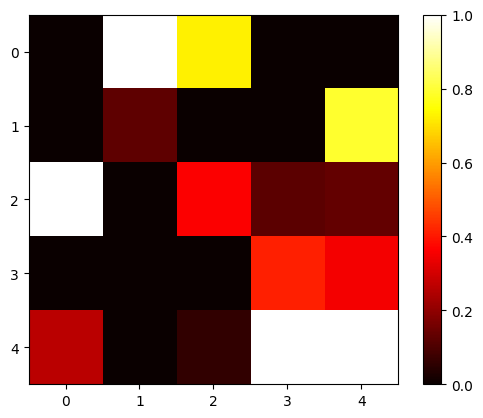

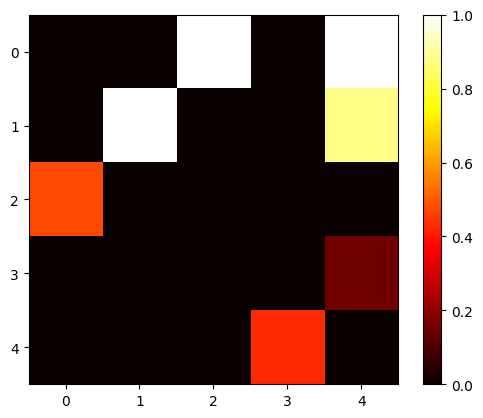

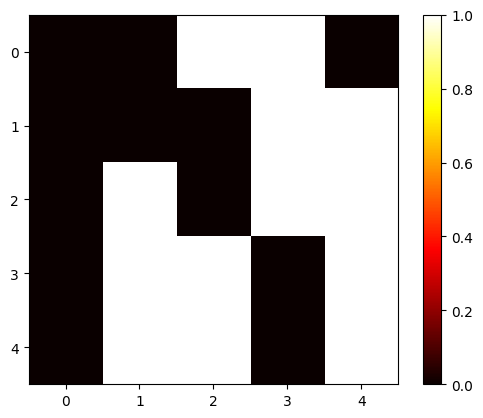

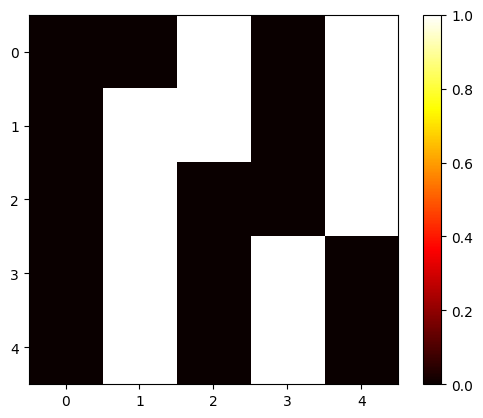

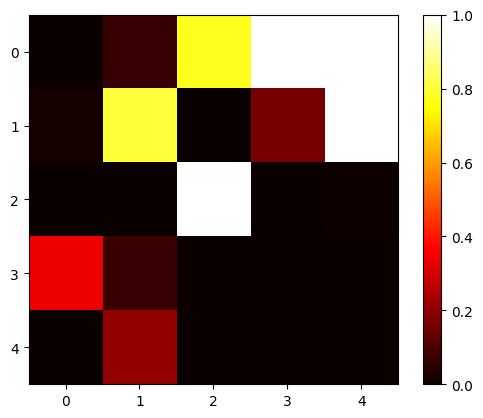

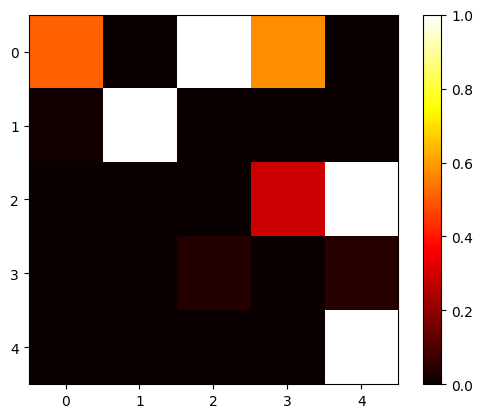

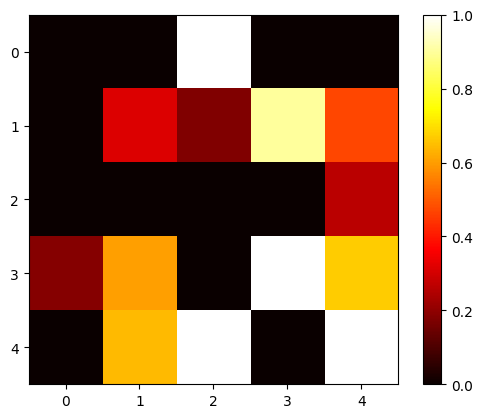

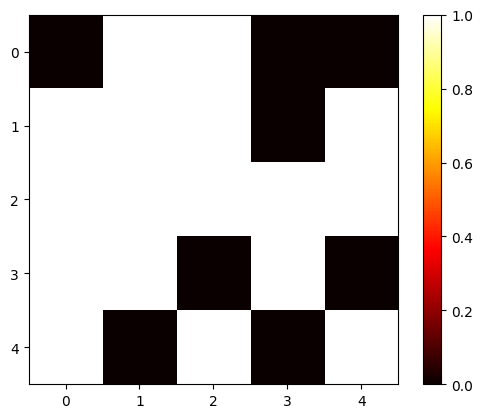

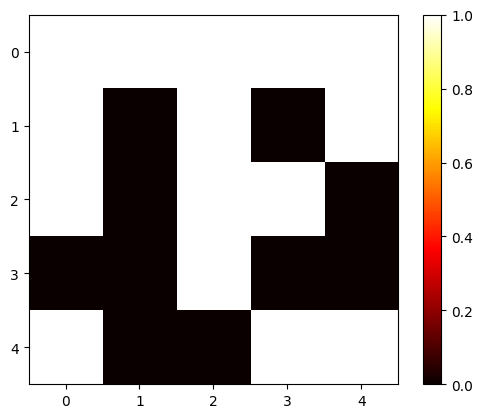

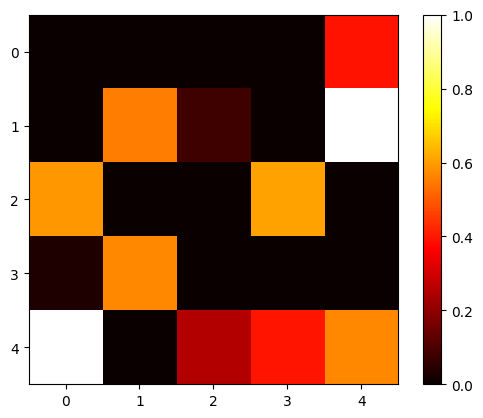

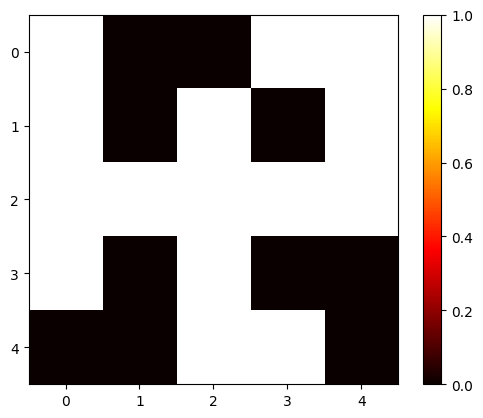

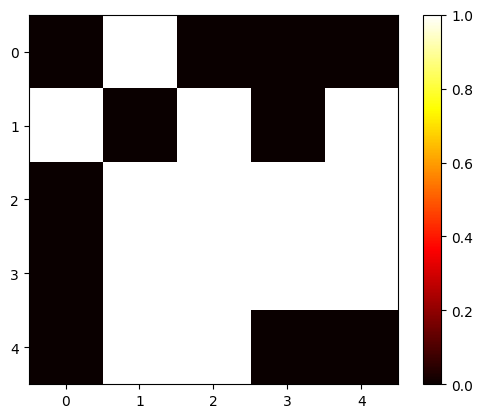

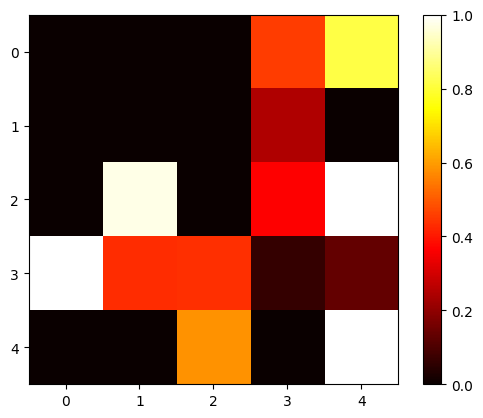

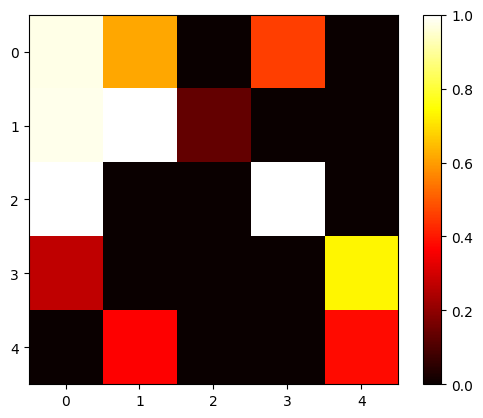

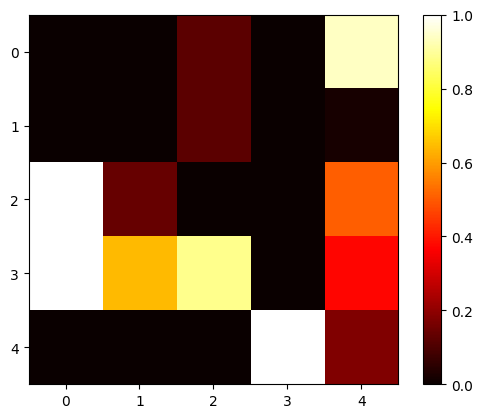

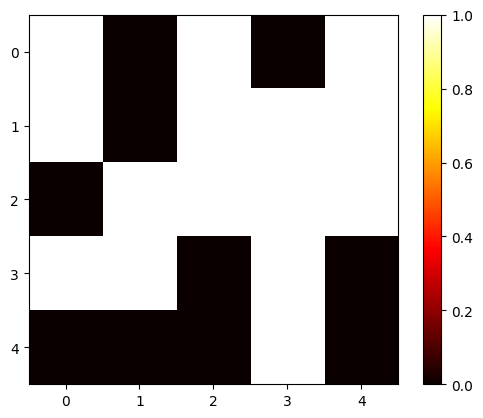

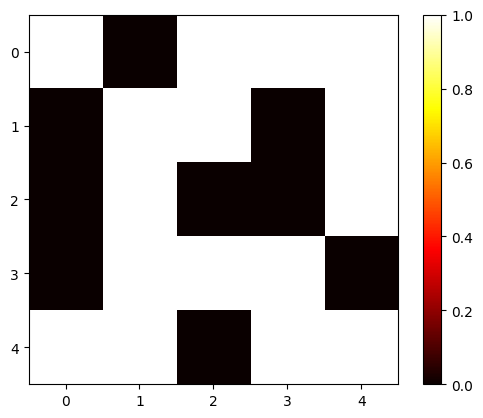

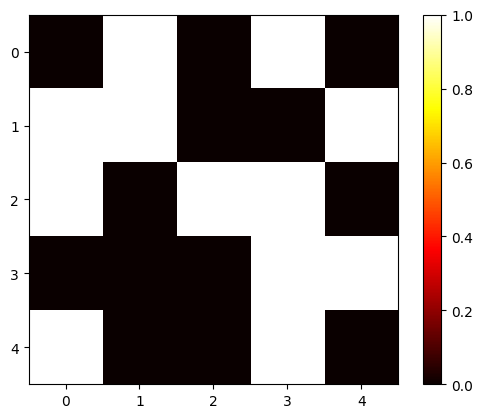

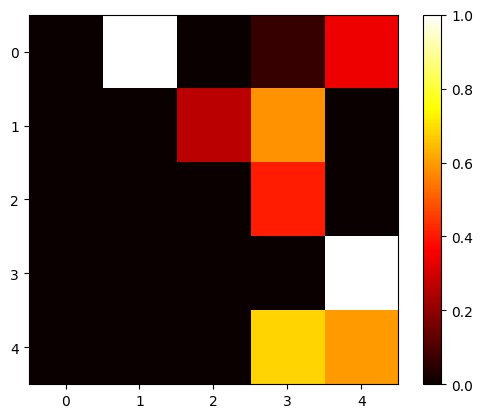

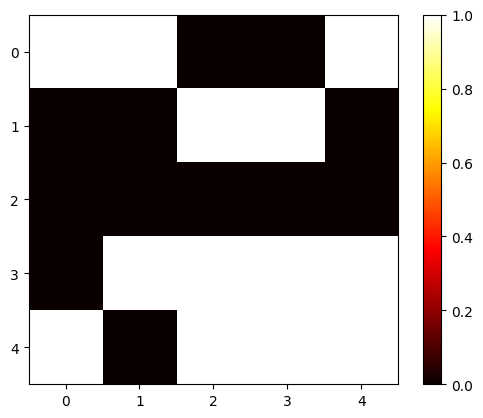

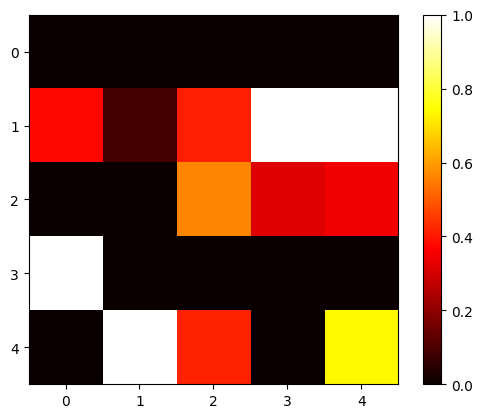

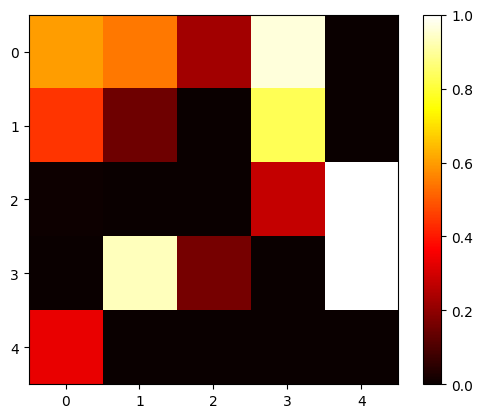

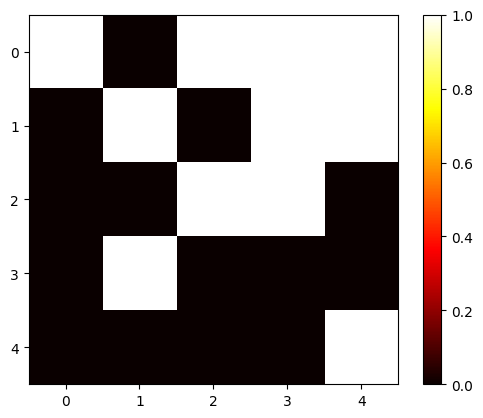

In [43]:
import numpy as np
import matplotlib.pyplot as plt
for i in range(data.shape[0]):
    plt.imshow(data[i,1], cmap='hot', interpolation='nearest')
    plt.colorbar()  # 添加颜色条
    plt.show()
